In [11]:
import urllib.request
import json
import os
os.chdir('/Users/ahutchin/Desktop/')

In [12]:
# Open and load the JSON file 
with open('season1.json', 'r') as file:
    GOTdata = json.load(file)

# access data in the JSON file 
print(type(GOTdata))
print(list(GOTdata.keys()))


<class 'dict'>
['Game Of Thrones S01E01 Winter Is Coming.srt', 'Game Of Thrones S01E02 The Kingsroad.srt', 'Game Of Thrones S01E03 Lord Snow.srt', 'Game Of Thrones S01E04 Cripples, Bastards, And Broken Things.srt', 'Game Of Thrones S01E05 The Wolf And The Lion.srt', 'Game Of Thrones S01E06 A Golden Crown.srt', 'Game Of Thrones S01E07 You Win Or You Die.srt', 'Game Of Thrones S01E08 The Pointy End.srt', 'Game Of Thrones S01E09 Baelor.srt', 'Game Of Thrones S01E10 Fire And Blood.srt']


In [13]:
#count the number of values for each key in the GOTdata dictionary to see which episode 
#in seasopn 1 had the greatest number of lines

#create empty dict to store counted items
linecount = {}

for key, value in GOTdata.items():
    #get length of the values in the list
    valuecount = len(value)
    if key not in linecount:
        linecount[key] = 0
    #add count for the key by the count of value
    linecount[key] += valuecount

for key, count in linecount.items():
    print(key,"///","Number of lines in episode:" ,count)

Game Of Thrones S01E01 Winter Is Coming.srt /// Number of lines in episode: 559
Game Of Thrones S01E02 The Kingsroad.srt /// Number of lines in episode: 571
Game Of Thrones S01E03 Lord Snow.srt /// Number of lines in episode: 740
Game Of Thrones S01E04 Cripples, Bastards, And Broken Things.srt /// Number of lines in episode: 754
Game Of Thrones S01E05 The Wolf And The Lion.srt /// Number of lines in episode: 741
Game Of Thrones S01E06 A Golden Crown.srt /// Number of lines in episode: 583
Game Of Thrones S01E07 You Win Or You Die.srt /// Number of lines in episode: 775
Game Of Thrones S01E08 The Pointy End.srt /// Number of lines in episode: 666
Game Of Thrones S01E09 Baelor.srt /// Number of lines in episode: 679
Game Of Thrones S01E10 Fire And Blood.srt /// Number of lines in episode: 590


We can see that episode 7 in season 1 had the greatest number of lines at 775

In [14]:
#parse data to take all values from episode 1 only and save as new variable
episode1 = GOTdata['Game Of Thrones S01E01 Winter Is Coming.srt']

#parse data to take all values from episode 7 only and save as new variable
episode7 = GOTdata['Game Of Thrones S01E07 You Win Or You Die.srt']

In [15]:
#take a quick look at a cleaner version of episode one JSON data

#json.dumps(episode1, sort_keys= True, indent = 3)

#above command commented out because output is approx 91 lines

In [16]:
# find the average length for all lines in episode 1 and 7
linelength1 = 0
values1 = 0

#find and count the length of each value in episode 1 and add length to linelength  
for value in episode1.values():
    linelength1 += len(value)
    #increase number of values by 1
    values1 +=1


#do same for espisode 7
linelength7 = 0
values7 = 0

for value in episode7.values():
    linelength7 += len(value)
    values7 +=1


#calculating average length of a value
avglength1 = linelength1 / values1
avglength7 = linelength7 / values7

#print avglenth and format to nearest whole number
print("the average character length of all the lines in esidoe 1 is:",f'{avglength1:.0f}')
print("the average character length of all the lines in esidoe 7 is:",f'{avglength7:.0f}')

the average character length of all the lines in esidoe 1 is: 31
the average character length of all the lines in esidoe 7 is: 33


In [17]:
#find the number of characters for the longest line in episode one and print that line
longestline =  max(episode1.values(), key = len)
print(len(longestline))
print(longestline)

88
- Don't leave me alone with these people. - I'm sorry, I've begun the feast a bit early.


In [18]:
#same for episode 7
longestline7 =  max(episode7.values(), key = len)
print(len(longestline7))
print(longestline7)

93
In the rare event that Robert leaves his whores for long enough to stumble drunk into my bed,


In [19]:
#find the number of characters for the shortest line in episode one and print that line
shortestline = min(episode1.values(),key = len)
print(len(shortestline))
print(shortestline)

3
No.


In [20]:
shortestline7 = min(episode7.values(),key = len)
print(len(shortestline7))
print(shortestline7)

3
Oh!


In [21]:
# find the number of times I appears in all lines of episode 1

#Define the character to search for and save to new variable
character = 'I'

charactercount = 0
for v in episode1.values():
    charactercount += v.count(character)

print(charactercount)

171


The caracter I appears in all lines of episode 1, 171 times

In [22]:
mostused = {}

for value in episode1.values():
    for c in value:
        mostused[c] = mostused.get(c,0) + 1

mostusedchar = max(mostused, key = mostused.get)

print(mostusedchar)

It appears that the most used character in episode one is a space

In [23]:
character = ' '

charactercount = 0
for v in episode1.values():
    charactercount += v.count(character)

print(charactercount)

2988


This helps prove that the most used character in episode 1 is in fact a space and it was used 2988 times

In [24]:
mostusedall = {}

for value in GOTdata.values():
    for x in value:
        #update the character count and adds to the mostusedall dict
        mostusedall[c] = mostusedall.get(x,0) + 1

#use max to find the mostused character
mostusedcharall = max(mostusedall, key = mostusedall.get)

print(mostusedcharall)


.


The most used character in all of the GOTdata was a period

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

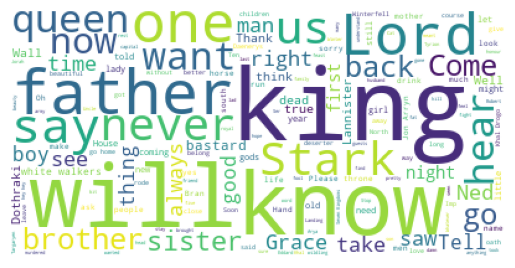

In [26]:
#join all the values in episode 1 dictionary together into single string
words1 = ''.join(episode1.values())
#create wordcloud for episode 1
wordcloud1 = WordCloud(background_color = 'white', max_font_size = 80).generate(words1)

#plot the word cloud for words in epiosde 1
plt.imshow(wordcloud1) 
plt.axis('off')
plt.show()

Top most used words in episode 1 appear to be : king , will, know

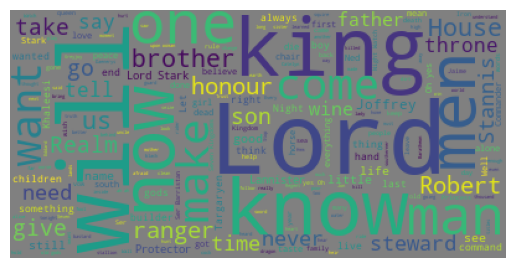

In [28]:
#join all the values in episode 1 dictionary togethr into single string
words7 = ''.join(episode7.values())
#create wordcloud for episode 1
wordcloud7 = WordCloud(background_color = 'grey',max_font_size= 80).generate(words7)

#plot the word cloud for words in epiosde 1
plt.imshow(wordcloud7) 
plt.axis('off')
plt.show()

Top most used words in episode 7 appear to be : lord, king , will, know